In [1]:
from time import time
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
digits = load_digits()

In [3]:
digits.DESCR
#it is a subset data from mnist dataset..

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [4]:
import numpy as np
import pandas as pd
y=digits.target
x=digits.data
img=digits.images

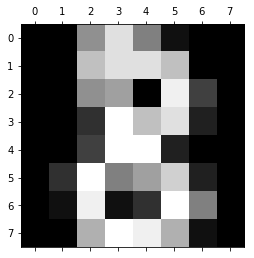

In [5]:
xx, yy = np.meshgrid(np.arange(8), np.arange(8))
plt.gray()
plt.matshow(img[8])
plt.show()

In [6]:
print(y[8])

8


In [7]:
#using sklearn's logistic regression
import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(x, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [8]:
res=clf.predict(x)

In [9]:
#finding accuracy ie correctly classifying any variable as its right class it belongs to.
accuracy=0.0;
for i in range(len(res)):
    if res[i]==y[i]:
        accuracy += 1
accuracy /= float(len(res))

In [10]:
accuracy

0.9860879243183083

In [11]:
#this is the confusion matrix shows us how each class is predicted correctly
#the row headers are actual values and column headers are predicted classes
confusion_mat=np.zeros([10,10])
for i in range(len(res)):
    confusion_mat[res[i]][y[i]] += 1.0
confusion_mat
#we see 1 is predicted as 8 many instances.

array([[ 178.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,  178.,    0.,    0.,    0.,    0.,    0.,    0.,    8.,
           1.],
       [   0.,    0.,  177.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,  180.,    0.,    0.,    0.,    0.,    1.,
           1.],
       [   0.,    0.,    0.,    0.,  181.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,  181.,    1.,    0.,    1.,
           1.],
       [   0.,    0.,    0.,    0.,    0.,    0.,  179.,    0.,    1.,
           0.],
       [   0.,    0.,    0.,    1.,    0.,    0.,    0.,  178.,    0.,
           0.],
       [   0.,    3.,    0.,    2.,    0.,    0.,    1.,    0.,  163.,
           0.],
       [   0.,    1.,    0.,    0.,    0.,    1.,    0.,    1.,    0.,
         177.]])

In [12]:
import math
##The sigmoid function adjusts the cost function hypothesis for binary classifiers exclusively.
##for multiclass classifiers we make no.of models equal to the classes and the hypothesis
##determines if it lies in that class or not
def Sigmoid(z):
    G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
    return G_of_Z 
#this softmax is used for ann here it has no use.
def Softmax(z):
    exp_scores = np.exp(z)
    return exp_scores

In [13]:
##This hypothesis will be used to calculate each instance of the Cost Function
##it returns the predicted probablity of that data point classified as a class or not
def Hypothesis(theta, x):
    z = 0
    for i in xrange(len(theta)):
        z += (x[i]*theta[i])
    prob=Sigmoid(z)
    return prob

In [14]:
##For each member of the dataset, the result (Y) determines which variation of the cost function is used
##The Y = 0 cost function punishes high probability estimations, and the Y = 1 it punishes low scores
##The "punishment" makes the change in the gradient of ThetaCurrent - Average(CostFunction(Dataset)) greater
##the cost function is sum(yi*log(hi)+(1-yi)*log(1-hi)) for all m data points average it and find the cost of each theta for 
##the error in the prediction
def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in xrange(m):
        xi = X[i]
        hi = Hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    print(J)

In [15]:
#this function find the error term for each theta value
#error for a theta= sum((hi-yi)*xij)*alpha/m for m data points 
#j is the x[i] component multiplied with the respective theta term.
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in xrange(m):
        xi = X[i]
        xij = xi[j]
        hi = Hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J

In [16]:
#thetaj=thetaj-d(cost function)/d(thetaj)
#d(cost function)/d(thetaj) is the error found for each theta by Cost_Function_Derivative
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in xrange(len(theta)):
        CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - CFDerivative
        new_theta.append(new_theta_value)
    return new_theta

In [17]:
def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in xrange(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        #if x % 5 == 0:
            #here the cost function is used to present the final hypothesis of the model in the same form for each gradient-step iteration
            #Cost_Function(X,Y,theta,m)
    return theta

In [34]:
#dict1 is the y term for each class dict1[class] shows the binary values signifying if the data is of that class or not
initial_theta = [0.0 for i in range(64)]
alpha = 0.1
iterations = 3
dict1={}
for i in range(10):
    dict1[i]=[]
    for j in range(len(y)):
        if y[j]== i:
            dict1[i].append(1)
        else:
            dict1[i].append(0)

In [35]:
#finding theta for each classes classification.
theta={}
for i in range(10):
    print('finding weights for each pixel.....')
    theta[i]=Logistic_Regression(x,dict1[i],alpha,initial_theta,iterations)
    print('finished for digit no. %f '%i)

finding weights for each pixel.....
finished for digit no. 0.000000 
finding weights for each pixel.....
finished for digit no. 1.000000 
finding weights for each pixel.....
finished for digit no. 2.000000 
finding weights for each pixel.....
finished for digit no. 3.000000 
finding weights for each pixel.....
finished for digit no. 4.000000 
finding weights for each pixel.....
finished for digit no. 5.000000 
finding weights for each pixel.....
finished for digit no. 6.000000 
finding weights for each pixel.....
finished for digit no. 7.000000 
finding weights for each pixel.....
finished for digit no. 8.000000 
finding weights for each pixel.....
finished for digit no. 9.000000 


In [36]:
#finding the probablities by forward propagating in the hypothesis and finding the argument or jth term having largest probablity
#this highest probablity argument is the class you can classify the data point into.
probarg=[]
for i in range(len(y)):
    maxarg=0
    maxval=0
    for j in range(10):
        well=Hypothesis(theta[j],x[i])
        if well>maxval:
            maxarg=j
            maxval=well
    probarg.append(maxarg)

In [37]:
probarg

[0,
 1,
 1,
 3,
 4,
 3,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 ...]

In [38]:
accuracy=0.0;
for i in range(len(probarg)):
    if probarg[i]==y[i]:
        accuracy += 1
accuracy /= float(len(probarg))

In [39]:
accuracy

0.8836950473010573